In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
class Linear():
    
    def __init__(self):
        self.weights = None
        self.m_rows = None
        self.n_cols = None
        self.normal_loss = None
        self.losses = []
        
    def get_dataset(self):
        self.dataset = pd.read_csv("train.csv")
        
        # Drop object/string columns for simplicity
        #self.dataset = self.dataset.select_dtypes(exclude = ['object'])
        
        # Define x and y matrices
        self.df_y = self.dataset["SalePrice"]
        self.df_x = pd.get_dummies(self.dataset.drop(["SalePrice"], axis=1))
        
        # Add bias
        self.df_x.insert(loc = 0, column = 'bias', value = 1)
        
        # Define m example rows and n feature columns
        self.m_rows = self.df_x.shape[0]
        self.n_cols = self.df_x.shape[1]
    
    def get_arrays(self):
        # Make y array n x 1 for matrix operations
        self.y = np.array(self.df_y)[:, np.newaxis]
        self.x = np.array(self.df_x)
    
    def normalize_columns(self):
        # Normalize all columns except bias (this is kinda messy but yolo)
        self.x[:,1:] = (self.x[:,1:] - self.x[:,1:].mean(axis = 0)) / self.x[:,1:].std(axis = 0)
    
    def fill_nans(self):
        # Naively fill nans as 0 (i.e. the average of each columns)
        self.x = np.nan_to_num(self.x)

    def predict(self, inputs):
        return np.matmul(inputs, self.weights)

    def fit_normal(self):
        # just using the normal equation
        if np.linalg.matrix_rank(linear.x) < self.n_cols:
            print('Uh oh! (X^T * X) will be singular! Adding some hacky regularization.')
            pinv = np.matmul(np.linalg.inv(np.matmul(self.x.T, self.x) + np.eye(self.n_cols)*1), self.x.T)
            self.weights = np.matmul(pinv, self.y)
        else:
            pinv = np.matmul(np.linalg.inv(np.matmul(self.x.T, self.x)), self.x.T)
            self.weights = np.matmul(pinv, self.y)
            
        self.normal_loss = self.calc_loss(self.x, self.y)

    def fit_SGD(self, batch_size, iterations, alpha):
        
        self.weights = np.zeros((self.n_cols, 1))
        self.losses = []
        
        for i in range(iterations):
            sample_ids = np.random.choice(self.m_rows, size = batch_size, replace = False)
            
            # Calculate loss and append to history for plotting curves
            loss = self.calc_loss(self.x[sample_ids], self.y[sample_ids])
            self.losses.append(loss)
            
            # Update weights
            grad = self.calc_gradient(self.x[sample_ids], self.y[sample_ids])
            self.weights -= alpha * grad

    def fit_BGD(self, iterations, alpha):
        
        self.weights = np.zeros((self.n_cols, 1))
        self.losses = []
        
        for i in range(iterations):
            
            # Calculate loss and append to history for plotting curves
            loss = self.calc_loss(self.x, self.y)
            self.losses.append(loss)
            
            # Update weights
            grad = self.calc_gradient(self.x, self.y)
            self.weights -= alpha * grad

    def calc_gradient(self, x_sample, y_sample):
                    
        # Calculate partial gradient for every weight
        # Note: (n x m) x (m x 1) = (n x 1) weights
        # When vectorizing, X^T goes at the front!!
        return np.dot(x_sample.T, (self.predict(x_sample) - y_sample))
    
    def calc_loss(self, x_sample, y_sample):
        return (1/2)*(sum(self.predict(x_sample) - y_sample)) ** 2
        
    def plot(self):
        
        plt.plot(range(len(self.losses)), [self.normal_loss]*len(self.losses), label = 'normal equation')
        plt.plot(range(len(self.losses)), self.losses, label = 'gradient descent')
        plt.legend()
        plt.show()
    
    def reset(self):
        self.weights = np.zeros(self.n_cols, 1)
        self.losses = []

In [3]:
linear = Linear()
linear.get_dataset()
linear.get_arrays()
linear.normalize_columns()
linear.fill_nans()

In [4]:
linear.fit_normal()

Uh oh! (X^T * X) will be singular! Adding some hacky regularization.


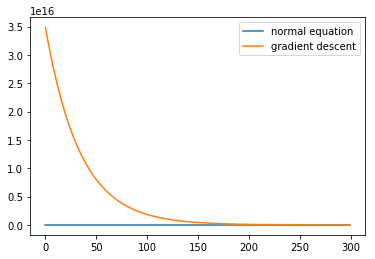

In [5]:
linear.fit_BGD(300, 0.00001)
linear.plot()

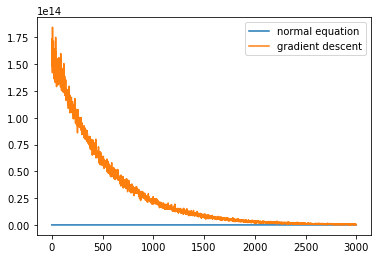

In [6]:
linear.fit_SGD(100, 3000, 0.00001)
linear.plot()

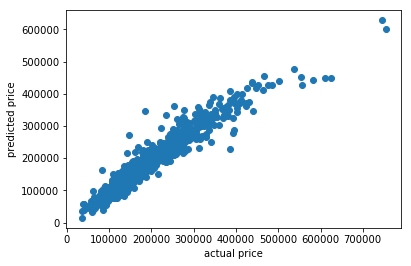

In [7]:
plt.figure()
fig, ax = plt.subplots()
plt.scatter(linear.y, linear.predict(linear.x))
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()